In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts =100
centers = [ [-0.5, 0.5], [0.5, -0.5] ]
X, y = datasets.make_blobs(n_samples = n_pts, random_state=123, centers = centers, cluster_std = 0.4)
print(X,'\n',y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])


In [0]:
# y = torch.randn(50)*0.5 + 0.5
# x = (torch.arange(50)-torch.arange(50)) - 0.5 + torch.randn(50)*0.3
# print(x)
# plt.scatter(x.numpy(), y.numpy())


In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def pred(self, x):
    p = self.forward(x)
    if p>= 0.5:
      return 1
    else:
      return 0 

In [0]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters(1)))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w ,b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
  return(w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

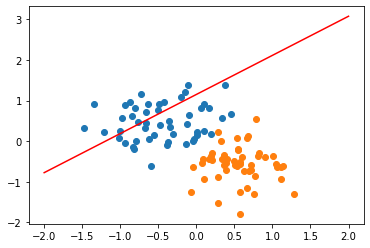

In [0]:
plot_fit("init model")

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [0]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).view(100,1)
print(x_data.shape, y_data.shape)

torch.Size([100, 2]) torch.Size([100, 1])


In [0]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred , y_data)
  print('epoch: ', i, '   loss: ', loss.item())
  losses.append(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0    loss:  0.6185115575790405
epoch:  1    loss:  0.6174639463424683
epoch:  2    loss:  0.6164201498031616
epoch:  3    loss:  0.6153794527053833
epoch:  4    loss:  0.614342451095581
epoch:  5    loss:  0.6133086681365967
epoch:  6    loss:  0.6122783422470093
epoch:  7    loss:  0.6112515330314636
epoch:  8    loss:  0.6102280616760254
epoch:  9    loss:  0.6092080473899841
epoch:  10    loss:  0.6081910729408264
epoch:  11    loss:  0.6071775555610657
epoch:  12    loss:  0.606167733669281
epoch:  13    loss:  0.6051608920097351
epoch:  14    loss:  0.604157567024231
epoch:  15    loss:  0.6031574606895447
epoch:  16    loss:  0.602160632610321
epoch:  17    loss:  0.6011670827865601
epoch:  18    loss:  0.6001767516136169
epoch:  19    loss:  0.599189817905426
epoch:  20    loss:  0.5982059240341187
epoch:  21    loss:  0.5972254276275635
epoch:  22    loss:  0.5962479114532471
epoch:  23    loss:  0.5952739119529724
epoch:  24    loss:  0.5943028926849365
epoch:  25    l

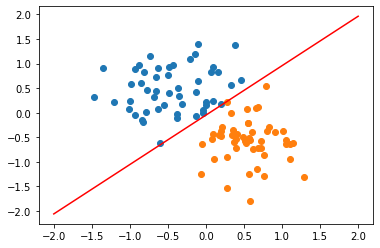

In [0]:
plot_fit('Trained model')

The prob that red is positive :  0
The prob that black point is positive :  1


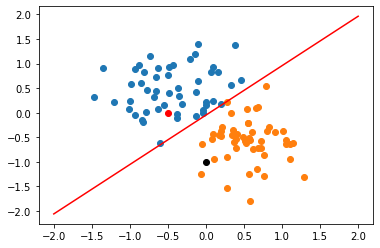

In [0]:
point1 = torch.Tensor([-0.5, 0])
point2 = torch.Tensor([0, -1])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit('trained model')
print('The prob that red is positive : ', model.pred(point1))
print('The prob that black point is positive : ', model.pred(point2))